# **01. Extracción de datos**

## Excel - xlsx

In [ ]:
import pandas as pd

df1 = pd.read_excel('soya_maiz.xlsx')
df1.head(12)

,Series temporales reales de precios de los productos soya y maíz.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"Soya: Indicador de precios de la soja, comerci...",NaN,NaN,NaN,NaN,NaN
1,"Maíz: Indicador de precios del maíz, comercial...",NaN,NaN,NaN,NaN,NaN
2,Fuente: www.cepea.esalq.usp.br,NaN,NaN,NaN,NaN,NaN
3,Período: Datos diarios del 02/01/2014 al 30/12...,NaN,NaN,NaN,NaN,NaN
4,Total de días: 498 días,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,Observación,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
7,1,02/01/2014,1,2014,26.64,72.18
8,2,03/01/2014,1,2014,27,71.42
9,3,06/01/2014,1,2014,27.29,71.38


In [ ]:
# Eliminar las primeras 6 filas
df1 = df1.iloc[6:]

# Establecer la primera fila como encabezado y la primera columna como índice
df1.columns = df1.iloc[0]
df1 = df1[1:]
df1 = df1.set_index(df1.columns[0])

df1.head()

6,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
Observación,,,,,
1,02/01/2014,1,2014,26.64,72.18
2,03/01/2014,1,2014,27,71.42
3,06/01/2014,1,2014,27.29,71.38
4,07/01/2014,1,2014,27.49,70.31
5,08/01/2014,1,2014,27.16,70.14


In [ ]:
# Convierte la columna 'Fecha' al formato de fecha
df1['Fecha'] = pd.to_datetime(df1['Fecha'], format='%d/%m/%Y')
df1.head()

6,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
Observación,,,,,
1,2014-01-02,1,2014,26.64,72.18
2,2014-01-03,1,2014,27,71.42
3,2014-01-06,1,2014,27.29,71.38
4,2014-01-07,1,2014,27.49,70.31
5,2014-01-08,1,2014,27.16,70.14


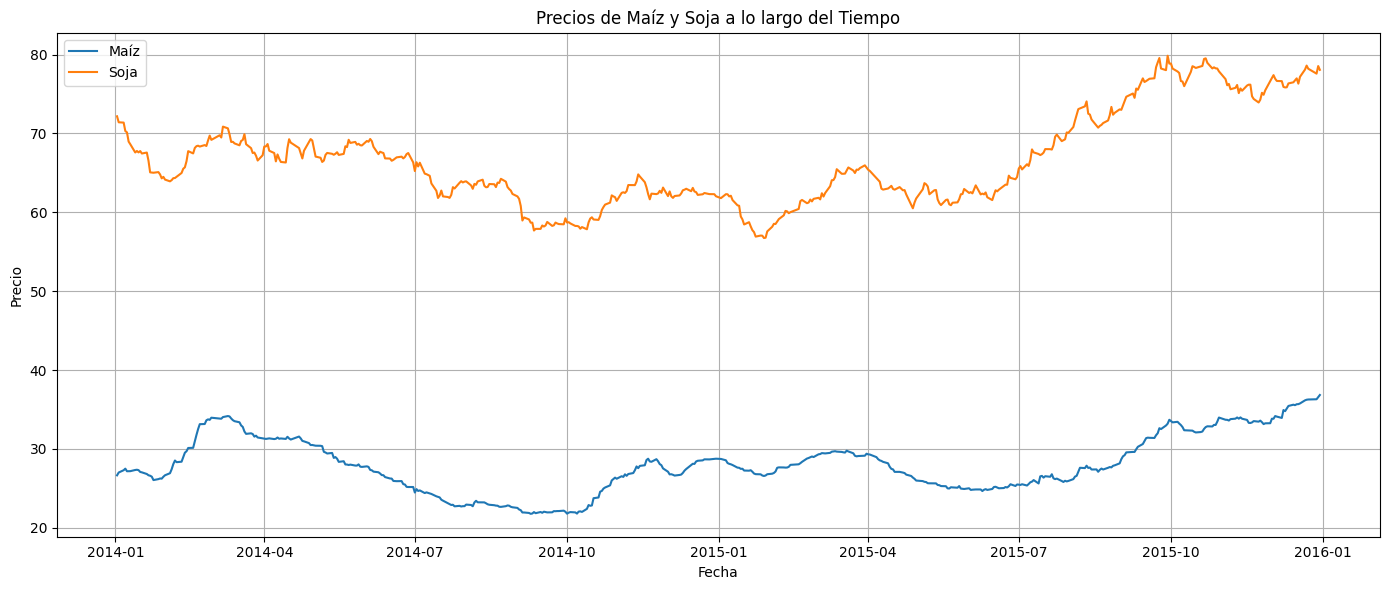

In [ ]:
import matplotlib.pyplot as plt

# Graficar los precios de maíz y soja a lo largo del tiempo
plt.figure(figsize=(14, 6))
plt.plot(df1['Fecha'], df1['Precios - Maíz'], label='Maíz')
plt.plot(df1['Fecha'], df1['Precios - Soja'], label='Soja')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precios de Maíz y Soja a lo largo del Tiempo')
plt.legend()


# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## CSV

- Fuente: https://www.kaggle.com/code/michau96/covid-19-continents-in-relation-to-time/input

In [ ]:
df2 = pd.read_csv('covid_19_data.csv')
df2.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


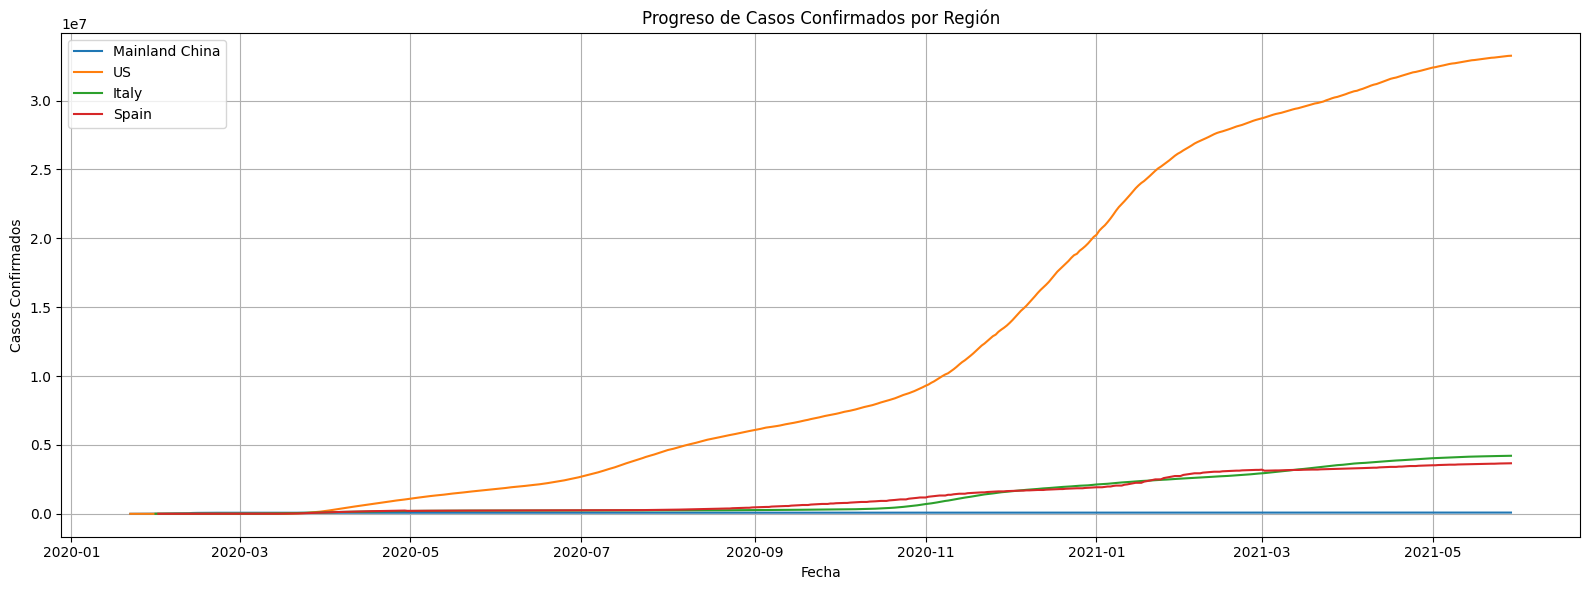

In [ ]:
# Convierte la columna 'ObservationDate' al formato de fecha
df2['ObservationDate'] = pd.to_datetime(df2['ObservationDate'])

# Agrupa los datos por 'ObservationDate' y 'Country/Region' sumando los casos confirmados
grouped = df2.groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum().reset_index()

# Graficar el progreso de casos confirmados por región a lo largo del tiempo
plt.figure(figsize=(16, 6))  # Tamaño del gráfico
for region in ['Mainland China', 'US', 'Italy', 'Spain']:
    region_data = grouped[grouped['Country/Region'] == region]
    plt.plot(region_data['ObservationDate'], region_data['Confirmed'], label=region)

# Añadir etiquetas, título y leyenda
plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.title('Progreso de Casos Confirmados por Región')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## Lectura de otras funtes de datos con Pandas



Documentación: https://pandas.pydata.org/docs/reference/io.html

* `pd.read_csv()`: Lee un archivo CSV y lo convierte en un DataFrame.
* `pd.read_excel()`: Lee un archivo Excel y lo convierte en un DataFrame.
* `pd.read_feather()`: Lee un archivo en formato Feather y lo convierte en un DataFrame.
* `pd.read_fwf()`: Lee un archivo de ancho fijo (fixed-width) y lo convierte en un DataFrame.
* `pd.read_gbq()`: Lee datos de Google BigQuery y los convierte en un DataFrame.
* `pd.read_hdf()`: Lee un archivo HDF5 y lo convierte en un DataFrame.
* `pd.read_html()`: Lee tablas HTML de una página web y las convierte en una lista de DataFrames.
* `pd.read_json()`: Lee datos en formato JSON y los convierte en un DataFrame.
* `pd.read_orc()`: Lee un archivo en formato ORC y lo convierte en un DataFrame.
* `pd.read_parquet()`: Lee un archivo en formato Parquet y lo convierte en un DataFrame.
* `pd.read_pickle()`: Lee un archivo en formato pickle y lo convierte en un DataFrame.
* `pd.read_sas()`: Lee un archivo en formato SAS y lo convierte en un DataFrame.
* `pd.read_spss()`: Lee un archivo en formato SPSS y lo convierte en un DataFrame.
* `pd.read_sql()`: Lee datos de una base de datos SQL y los convierte en un DataFrame.
* `pd.read_sql_query()`: Lee los resultados de una consulta SQL y los convierte en un DataFrame.
* `pd.read_sql_table()`: Lee una tabla de una base de datos SQL y la convierte en un DataFrame.
* `pd.read_stata()`: Lee un archivo en formato Stata y lo convierte en un DataFrame.
* `pd.read_table()`: Lee un archivo de texto y lo convierte en un DataFrame.

## Base de datos

In [ ]:
!pip install mysql-connector-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 27.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [ ]:
import mysql.connector

# Conectarse a la base de datos
conexion = mysql.connector.connect(
    host='srv1183.hstgr.io',
    user='u587543157_data_analytics',
    password='o1gJg0IeQ2YlqhrVuq17sYTBmCbOyKWW',
    database='u587543157_data_analytics'
)

In [ ]:
# Se crea la consulta
sql_query = "SELECT * FROM ssitem"

#Se envia la consulta y se almacena la respuesta
df = pd.read_sql_query(sql_query, conexion)

df.head(12)

<ipython-input-15-4e4906818d7c>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conexion)


,ItemId,ItemName,ItemBrand,ItemCategory,ItemUnitPrice
0,I0036566,17 inch Color Monitor,"ColorMeg, Inc.",Electronics,169.00
1,I0036577,19 inch Color Monitor,"ColorMeg, Inc.",Electronics,319.00
2,I1114590,R3000 Color Laser Printer,Connex,Printing,699.00
3,I1412138,10 Foot Printer Cable,Ethlite,Computer Accessories,12.00
4,I1445671,8-Outlet Surge Protector,Intersafe,Computer Accessories,14.99
5,I1556678,CVP Ink Jet Color Printer,Connex,Printing,99.00
6,I3455443,Color Ink Jet Cartridge,Connex,Printing,38.00
7,I4201044,36-Bit Color Scanner,UV Components,Scanning,199.99
8,I6677900,Black Ink Jet Cartridge,Connex,Printing,25.69
9,I9995676,Battery Back-up System,Cybercx,Computer Accessories,89.00


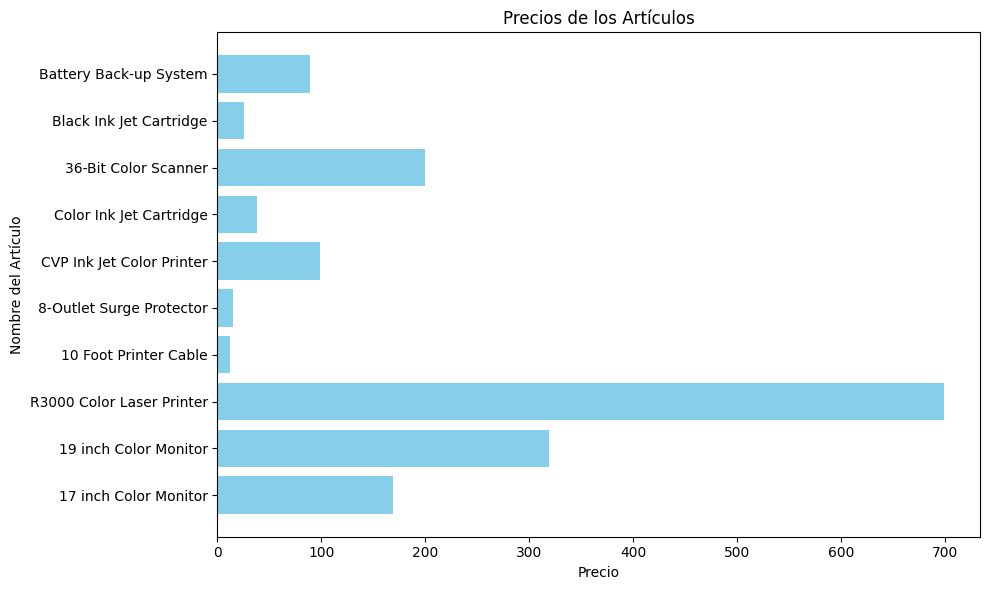

In [ ]:
# Graficar los precios de los artículos
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

plt.barh(df['ItemName'], df['ItemUnitPrice'], color='skyblue')
plt.xlabel('Precio')
plt.ylabel('Nombre del Artículo')
plt.title('Precios de los Artículos')

plt.tight_layout()
plt.show()

## Otros conectores

Existen varios conectores y librerías para conectarse a diferentes tipos de bases de datos desde Python:

**MySQL**:
   - `mysql-connector-python`: Un conector oficial de MySQL para Python.
   - `PyMySQL`: Una implementación pura de Python del cliente MySQL.

**PostgreSQL**:
   - `psycopg2`: Un adaptador PostgreSQL para Python.
   - `asyncpg`: Una librería PostgreSQL para Python asíncrono.

**SQLite**:
   - `sqlite3`: Este conector ya está incluido en la biblioteca estándar de Python, por lo que no se necesita instalar nada adicional para trabajar con bases de datos SQLite.

**Oracle**:
   - `cx_Oracle`: Un paquete que permite la conexión a bases de datos Oracle.

**SQL Server**:
   - `pyodbc`: Un módulo Python que permite la conexión a bases de datos SQL Server.

**MongoDB**:
   - `pymongo`: Una biblioteca oficial de Python para trabajar con MongoDB.

**Cassandra**:
   - `cassandra-driver`: Un controlador de Python para Cassandra.

**Redis**:
   - `redis-py`: Una biblioteca de Python para trabajar con Redis.

**Elasticsearch**:
   - `elasticsearch`: Una biblioteca de Python para interactuar con Elasticsearch.

Estos son solo algunos de los conectores más populares y utilizados en Python para diferentes bases de datos y sistemas de almacenamiento de datos. La elección del conector depende de la base de datos que estés utilizando y las funcionalidades específicas que necesites en tu aplicación.

## API Rest

In [ ]:
!pip install fredapi

In [ ]:
from fredapi import Fred

# API de FRED
api_key = '221237c910d1966723d4eea58dfaa0e4 '
fred = Fred(api_key=api_key)

# Ejemplos de series de tiempo (PIB, Inflación, Tasa de desempleo)
series = ['GDPC1', 'CPIAUCSL', 'UNRATE']

# Descarga los datos de FRED
data = {}
for series_id in series:
    data[series_id] = fred.get_series(series_id)


df = pd.DataFrame(data)
df.head()

,GDPC1,CPIAUCSL,UNRATE
1947-01-01,2182.681,21.48,NaN
1947-02-01,NaN,21.62,NaN
1947-03-01,NaN,22.00,NaN
1947-04-01,2176.892,22.00,NaN
1947-05-01,NaN,21.95,NaN


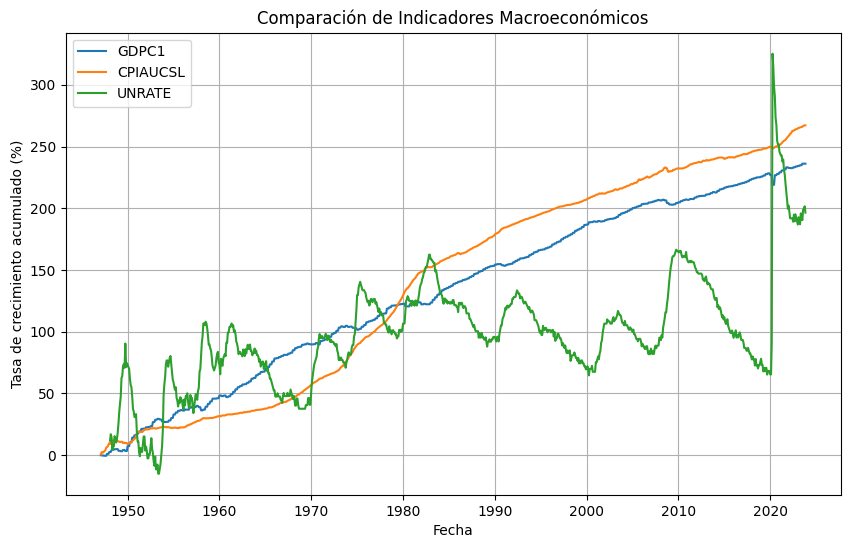

In [ ]:
# Porcentaje de cambio acumulado
for column in df.columns:
    df[column + '%'] = df[column].pct_change().cumsum() * 100

# Grafica los datos
plt.figure(figsize=(10, 6))
for column in df.columns:
    if column.endswith('%'):
        plt.plot(df.index, df[column], label=column[:-1])  # Elimina el '%' del nombre de la serie

plt.title("Comparación de Indicadores Macroeconómicos")
plt.xlabel("Fecha")
plt.ylabel("Tasa de crecimiento acumulado (%)")
plt.grid(True)
plt.legend()
plt.show()

## Bibliotecas de datos

In [ ]:
import yfinance as yf

In [ ]:
def porcentaje(data):
    a = list(data['Open'])
    b = list(data['Close'])
    c = []

    for i in range(len(a)):
        c.append(round(100 -(a[i] * 100 / b[i]),2))

    if '%' not in data.columns:
        data.insert(loc = 6, column = '%', value = c)


In [ ]:
ts = "2018-01-01"
itv = "1d"

DataDJI = yf.download("^DJI", start=ts, interval=itv, progress=False)
DataSP500 = yf.download("^GSPC", start=ts, interval=itv, progress=False)
DataNASDAQ = yf.download("^IXIC", start=ts, interval=itv, progress=False)

indices = [DataDJI, DataSP500, DataNASDAQ]

for index in indices:
    porcentaje(index)

In [ ]:
DataNASDAQ.head()

,Open,High,Low,Close,Adj Close,Volume,%
Date,,,,,,,
2018-01-02,6937.649902,7006.910156,6924.080078,7006.899902,7006.899902,1929700000,0.99
2018-01-03,7017.069824,7069.149902,7016.700195,7065.529785,7065.529785,2173130000,0.69
2018-01-04,7089.500000,7098.049805,7072.379883,7077.910156,7077.910156,2103220000,-0.16
2018-01-05,7105.740234,7137.040039,7097.080078,7136.560059,7136.560059,2024000000,0.43
2018-01-08,7135.379883,7161.350098,7124.089844,7157.390137,7157.390137,2055010000,0.31


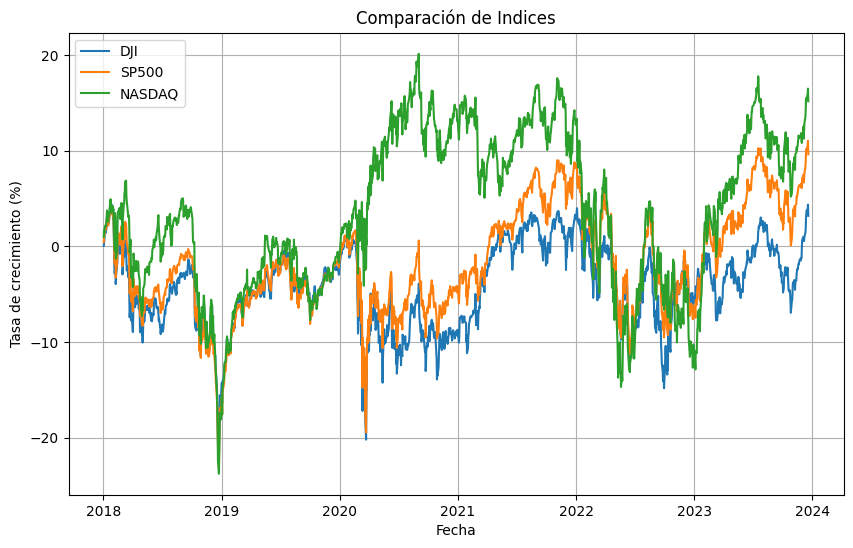

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(DataDJI.index, DataDJI["%"].cumsum(), label="DJI")
plt.plot(DataSP500.index, DataSP500["%"].cumsum(), label="SP500")
plt.plot(DataNASDAQ.index, DataNASDAQ["%"].cumsum(), label="NASDAQ")

plt.title("Comparación de Indices")
plt.xlabel("Fecha")
plt.ylabel("Tasa de crecimiento (%)")
plt.grid(True)
plt.legend()
plt.show()

## Fuentes de obtención de datos

> Plataformas Nacionales de Datos Abiertos
* Perú: https://www.datosabiertos.gob.pe/
* Mexico: https://datos.gob.mx/
* Brasil: https://www.gov.br/inpi/es/acceso-a-informacion/datos-abiertos

> Plataformas de Datos
* Kaggle: https://www.kaggle.com/
* UC Irvine: https://archive.ics.uci.edu/datasets

> INEI
* Indice tematico: https://m.inei.gob.pe/estadisticas/indice-tematico/economia/
* Microdatos: https://proyectos.inei.gob.pe/microdatos/

# **02. Limpieza de Datos**


## 1. Leer Datos  /  lectura de archivo

In [11]:
import pandas as pd
datos=pd.read_excel("soya_maiz.xlsx")
datos

,Observación,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
0,1,02/01/2014,1,2014,26.64,72.18
1,2,03/01/2014,1,2014,27.00,71.42
2,3,06/01/2014,1,2014,27.29,71.38
3,4,07/01/2014,1,2014,27.49,70.31
4,5,08/01/2014,1,2014,27.16,70.14
...,...,...,...,...,...,...
493,494,22/12/2015,12,2015,36.23,78.61
494,495,23/12/2015,12,2015,36.26,78.21
495,496,28/12/2015,12,2015,36.29,77.59
496,497,29/12/2015,12,2015,36.55,78.55


##2.  verificación de datos nulos

In [13]:
#agregamos la función isnull.
#datos.isnull()
#Si lo prefieres puedes usar:
datos.notnull()

,Observación,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
493,True,True,True,True,True,True
494,True,True,True,True,True,True
495,True,True,True,True,True,True
496,True,True,True,True,True,True


### 2.1 Eliminar filas que contiene datos nulos

In [14]:
datosBK = datos
datosCL = datosBK.dropna() #dropna() elimina las filas que contengan un dato nulo
datosCL

,Observación,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
0,1,02/01/2014,1,2014,26.64,72.18
1,2,03/01/2014,1,2014,27.00,71.42
2,3,06/01/2014,1,2014,27.29,71.38
3,4,07/01/2014,1,2014,27.49,70.31
4,5,08/01/2014,1,2014,27.16,70.14
...,...,...,...,...,...,...
493,494,22/12/2015,12,2015,36.23,78.61
494,495,23/12/2015,12,2015,36.26,78.21
495,496,28/12/2015,12,2015,36.29,77.59
496,497,29/12/2015,12,2015,36.55,78.55


### 2.2 Rellenar datos nulos

In [15]:
datosBK1 = datos
#fillna(value) rellena el dato vacio con un valor asignado,  en este caso estamos rellenando la media en esos datos vacios
datosCL = datosBK1.fillna(datosBK1.mean())
datosCL

<ipython-input-15-faa276802b0b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  datosCL = datosBK1.fillna(datosBK1.mean())


,Observación,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
0,1,02/01/2014,1,2014,26.64,72.18
1,2,03/01/2014,1,2014,27.00,71.42
2,3,06/01/2014,1,2014,27.29,71.38
3,4,07/01/2014,1,2014,27.49,70.31
4,5,08/01/2014,1,2014,27.16,70.14
...,...,...,...,...,...,...
493,494,22/12/2015,12,2015,36.23,78.61
494,495,23/12/2015,12,2015,36.26,78.21
495,496,28/12/2015,12,2015,36.29,77.59
496,497,29/12/2015,12,2015,36.55,78.55


In [16]:
datosBK2 = datos
#fillna(value) rellena el dato vacio con un valor asignado,  en este caso rellenaremos de a cuerdo al dato siguiente usando (method = "bfill")
datosCL = datosBK1.fillna(method = "bfill")
datosCL

,Observación,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
0,1,02/01/2014,1,2014,26.64,72.18
1,2,03/01/2014,1,2014,27.00,71.42
2,3,06/01/2014,1,2014,27.29,71.38
3,4,07/01/2014,1,2014,27.49,70.31
4,5,08/01/2014,1,2014,27.16,70.14
...,...,...,...,...,...,...
493,494,22/12/2015,12,2015,36.23,78.61
494,495,23/12/2015,12,2015,36.26,78.21
495,496,28/12/2015,12,2015,36.29,77.59
496,497,29/12/2015,12,2015,36.55,78.55


#3. verificación de tipos de dato

In [17]:
datosBK3 = datos
datosBK3.info() #se verifica los tipos de datos
datosBK3.dtypes #funcion para ver tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Observación     498 non-null    int64  
 1   Fecha           498 non-null    object 
 2   Mês             498 non-null    int64  
 3   Año - Cosecha   498 non-null    int64  
 4   Precios - Maíz  498 non-null    float64
 5   Precios - Soja  498 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 23.5+ KB


Observación         int64
Fecha              object
Mês                 int64
Año - Cosecha       int64
Precios - Maíz    float64
Precios - Soja    float64
dtype: object

##3.1 cambiar tipo de dato

In [18]:
from datetime import datetime
datosBK3['Fecha'] = pd.to_datetime(datosBK3['Fecha']) #cambia el tipod e dato a "datetime"
#funciones para verificar los tipos de datos e información de cada dato en el dataframe
datosBK3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Observación     498 non-null    int64         
 1   Fecha           498 non-null    datetime64[ns]
 2   Mês             498 non-null    int64         
 3   Año - Cosecha   498 non-null    int64         
 4   Precios - Maíz  498 non-null    float64       
 5   Precios - Soja  498 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 23.5 KB


<ipython-input-18-57f4177f825e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datosBK3['Fecha'] = pd.to_datetime(datosBK3['Fecha']) #cambia el tipod e dato a "datetime"


muchas mas funciones en: https://lauralpezb.medium.com/limpieza-de-datos-con-python-48d436ca9ace

In [20]:
datosBK3


,Observación,Fecha,Mês,Año - Cosecha,Precios - Maíz,Precios - Soja
0,1,2014-02-01,1,2014,26.64,72.18
1,2,2014-03-01,1,2014,27.00,71.42
2,3,2014-06-01,1,2014,27.29,71.38
3,4,2014-07-01,1,2014,27.49,70.31
4,5,2014-08-01,1,2014,27.16,70.14
...,...,...,...,...,...,...
493,494,2015-12-22,12,2015,36.23,78.61
494,495,2015-12-23,12,2015,36.26,78.21
495,496,2015-12-28,12,2015,36.29,77.59
496,497,2015-12-29,12,2015,36.55,78.55


muchas mas funciones en: https://lauralpezb.medium.com/limpieza-de-datos-con-python-48d436ca9ace